# Assignment 1: Movielens case study. 


#### Requirements
1. Import the three datasets
2. Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [143]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [144]:
movies_df = pd.read_csv('movies.dat', sep='::',names=['MovieID','Title','Genres'], encoding = 'ISO-8859-1', engine = 'python')
user_df = pd.read_csv('users.dat', sep='::',names=['UserID','Gender','Age', 'Occupation', 'zip-code'], encoding = 'ISO-8859-1', engine = 'python')
ratings_df = pd.read_csv('ratings.dat', sep='::',names=['UserID','MovieID','Rating', 'Timestamp'], encoding = 'ISO-8859-1', engine = 'python')

In [145]:
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [146]:
user_df.head()

,UserID,Gender,Age,Occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [147]:
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [148]:
temp_df = pd.merge(movies_df, ratings_df,on='MovieID')

In [149]:
master_df = pd.merge(temp_df, user_df,on='UserID')

In [150]:
master_df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [151]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Rating      1000209 non-null  int64 
 5   Timestamp   1000209 non-null  int64 
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   zip-code    1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [152]:
master_data = master_df[['MovieID', 'Title',  'UserID', 'Age', 'Gender', 'Occupation', 'Genres','Rating']].copy()

### EDA
#### Requirements: 
Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
1) User Age Distribution                                                                    
2) User rating of the movie “Toy Story”                                      
3) Top 25 movies by viewership rating                                                   
4) Find the ratings for all the movies reviewed by for a particular user of user id = 2696

Text(0, 0.5, 'Density')

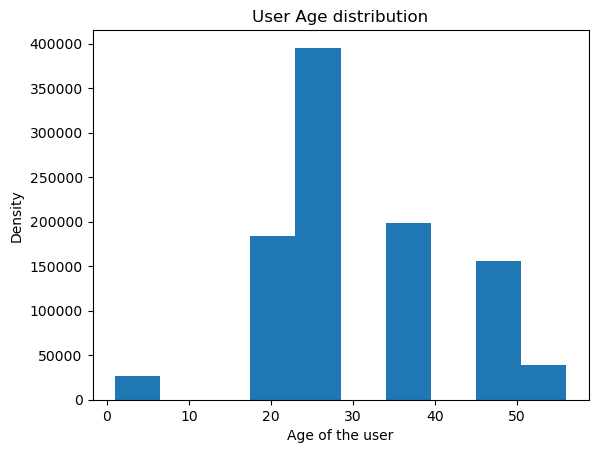

In [153]:
plt.hist(master_df['Age'])
plt.title('User Age distribution')
plt.xlabel('Age of the user')
plt.ylabel('Density')

Key takeaway: The density for the ages between 18-28 is higher compared to any other age group. I.e, people between the age groups of 18-28 tend to watch more movies.  

In [154]:
temp_df = master_df.loc[master_df['Title'] == 'Toy Story (1995)']

Text(0, 0.5, 'Denstiy')

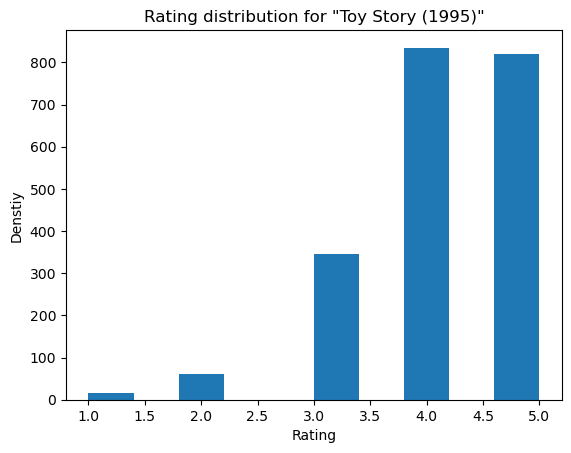

In [155]:
plt.hist(temp_df['Rating'])
plt.title('Rating distribution for "Toy Story (1995)"')
plt.xlabel('Rating')
plt.ylabel('Denstiy')

Key takeaway: The ratings for the movie is on a positive side with the rating '4' being the highest density.

In [156]:
max_rating = master_df.groupby(['Title'])['Rating']

#### Top 25 movies by viewership rating

In [157]:
max_rating = max_rating.count().sort_values(ascending=False)
max_rating[0:25]

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

#### Ratings for all the movies reviewed by for a particular user of user id = 2696

In [158]:
s_user = master_df.loc[master_df['UserID']== 2696]

In [159]:
s_user

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,zip-code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


### Feature engineering: 

Feature Engineering:
Use column genres:

1) Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)                                                   
2) Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.                                                                                  
3) Determine the features affecting the ratings of any particular movie.                                
4) Develop an appropriate model to predict the movie ratings

Unique genres in the dataset:

In [160]:
master_df['Genres'].unique()

array(["Animation|Children's|Comedy",
       "Animation|Children's|Musical|Romance", 'Drama',
       'Action|Adventure|Fantasy|Sci-Fi', 'Drama|War', "Children's|Drama",
       "Animation|Children's|Comedy|Musical",
       "Animation|Children's|Musical", 'Crime|Drama|Thriller',
       'Animation', 'Animation|Comedy|Thriller', 'Musical|Romance',
       "Adventure|Children's|Drama|Musical", 'Musical',
       "Children's|Comedy|Musical", "Children's|Drama|Fantasy|Sci-Fi",
       'Action|Adventure|Comedy|Romance', 'Comedy|Sci-Fi',
       'Action|Adventure|Drama',
       "Adventure|Animation|Children's|Comedy|Musical", 'Drama|Romance',
       "Animation|Children's", 'Action|Drama|War', 'Comedy', 'Romance',
       'Action|Crime|Romance', 'Thriller', 'Comedy|Fantasy',
       'Comedy|Drama', "Children's|Comedy|Drama", 'Drama|Musical',
       'Drama|Romance|War|Western', 'Crime|Drama',
       'Action|Comedy|Western', 'Action|Romance|Thriller', 'Western',
       "Children's|Comedy", 'Adventure|Dr

#### One hot encoder values (0,1)

In [161]:
df_dummies = master_data['Genres'].str.get_dummies(sep = '|')
df_f = pd.get_dummies(master_data['Gender'])

In [162]:
master_temp = master_data.drop(['Genres', 'Gender'], axis = 1)
master_temp = pd.concat([df_dummies, master_temp], axis = 1)
master_data = pd.concat([df_f, master_temp], axis = 1)

In [163]:
master_data.head()

,F,M,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Sci-Fi,Thriller,War,Western,MovieID,Title,UserID,Age,Occupation,Rating
0,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,1,Toy Story (1995),1,1,10,5
1,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,48,Pocahontas (1995),1,1,10,5
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,150,Apollo 13 (1995),1,1,10,5
3,1,0,1,1,0,0,0,0,0,0,...,1,0,0,0,260,Star Wars: Episode IV - A New Hope (1977),1,1,10,4
4,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,527,Schindler's List (1993),1,1,10,5


In [165]:
main_df = master_data.drop(['MovieID', 'Title', 'UserID'], axis = 1)
main_df.head()

,F,M,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Age,Occupation,Rating
0,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,10,5
1,1,0,0,0,1,1,0,0,0,0,...,1,0,1,0,0,0,0,1,10,5
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,10,5
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,10,4
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,10,5


#### Features affecting Ratings of a movie:
We have eliminated features such as MovieID, UserID, Title as they are unique values which do not give any importance to predicting the dependent (Ratings) variable. 

In [166]:
main_df.dtypes

F              uint8
M              uint8
Action         int64
Adventure      int64
Animation      int64
Children's     int64
Comedy         int64
Crime          int64
Documentary    int64
Drama          int64
Fantasy        int64
Film-Noir      int64
Horror         int64
Musical        int64
Mystery        int64
Romance        int64
Sci-Fi         int64
Thriller       int64
War            int64
Western        int64
Age            int64
Occupation     int64
Rating         int64
dtype: object

#### Building the model
- Now that the data is encoded, it is ready to be trained and tested.                                  
- We first split the data into train and test (70-30).                                                           
- Train the data, and later go on to test the same.                                                            
- The measure to evaluate the model is MAE, MSE and RMSE                                                      


In [212]:
X = main_df.iloc[:,:-1].values
y = main_df.iloc[:, -1].values


In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [214]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [215]:
y_pred = regressor.predict(X_test)


In [216]:
prediction_df = pd.DataFrame({'Test': y_test, 'Prediction': y_pred})
prediction_df

,Test,Prediction
0,4,3.662307
1,3,3.682625
2,5,3.745125
3,4,3.656337
4,5,3.688505
...,...,...
300058,4,3.675135
300059,4,3.484614
300060,3,3.630937
300061,4,3.647404


In [217]:

print('MAE: ',metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  0.9013901071913692
MSE:  1.201667512069826
RMSE: 1.0962059624312512
